A-Carga de datos y librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

laliga_data = pd.read_excel("/content/LaLiga_Mod1y3.xlsx")
print(laliga_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Jugador                                   718 non-null    object 
 1   Clasificación                             718 non-null    int64  
 2   Club                                      718 non-null    object 
 3   Posición                                  718 non-null    object 
 4   Edad                                      718 non-null    int64  
 5   Partidos 
jugados                         718 non-null    int64  
 6   Titular                                   718 non-null    int64  
 7   Min                                       581 non-null    float64
 8   Goles                                     583 non-null    float64
 9   Asistencias                               583 non-null    float64
 10  Tiros de penalti ejecutados           

|   | Jugador        | Clasificación | Club             | Posición | Edad |   Partidos \njugados |   Titular |    Min |   Goles |
|--:|----------------|----------------|------------------|----------|------|----------------------:|----------:|-------:|--------:|
| 0 | Jan Oblak      | 1              | Atlético de Madrid | PO       | 27   |                   38 |        38 |  3.420 |     0.0   |
| 1 | Koke           | 1              | Atlético de Madrid | CC       | 28   |                   37 |        34 |  3.021 |     1.0  |
| 2 | Marcos Llorente| 1              | Atlético de Madrid | CC_DL    | 25   |                   37 |        33 |  2.956 |    12.0   |

- En la tabla anterior se observa 3.240 pero Pandas lo está asumiendo como decimal al igual que Koke con 3.021 o Marcos Llorente con 2.956 (_nótese que 12 goles se digita 12.0 y ahí si está correcto_)
- El problema es que no son decimales como se explica en la tabla siguiente y su comentario

| Jugador          | Clasificación | Club             | Posición | Edad | Partidos Jugados | Titular | Min  |
|------------------|----------------|------------------|----------|------|-----------------|---------|------|
| Jan Oblak        | 1              | Atlético de Madrid | PO       | 27   | 38              | 38      | 3,42 |
| Thibaut Courtois | 2              | Real Madrid      | PO       | 28   | 38              | 38      | 3,42 |
| Álex Remiro      | 5              | Real Sociedad    | PO       | 25   | 38              | 38      | 3,42 |

- Tres porteros titulares que jueguen 38 partidos no pueden tener 3,42 minutos cada uno, ni siquiera 342.
- Revisando el excel hay nùmero enteros que están bien pero otros se les colocó manualmente una coma ",". Esto hizo que unos estén en decimales en vez de miles mientras que otros si están en miles.
- Al reemplazar en el archivo de excel las comas por "nada", es decir, desparecerlas, se corrigió el problema y hubo 318 reemplazos quedando ya el DF corregido como se ve a continuación.

# 1. Visualización de datos iniciales:

In [ ]:
laliga_data

,Jugador,Clasificación,Club,Posición,Edad,Partidos \njugados,Titular,Min,Goles,Asistencias,Tiros de penalti ejecutados,Tiros de penalti intentados,Tarjetas Amarillas,Tarjetas Rojas,Total de disparos (sin incluir penaltis)
0,Jan Oblak,1,Atlético de Madrid,PO,27,38,38,3420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Koke,1,Atlético de Madrid,CC,28,37,34,3021.0,1.0,2.0,0.0,0.0,9.0,0.0,17.0
2,Marcos Llorente,1,Atlético de Madrid,CC_DL,25,37,33,2956.0,12.0,11.0,0.0,0.0,6.0,0.0,49.0
3,Stefan Savic,1,Atlético de Madrid,DF,29,33,33,2953.0,1.0,0.0,0.0,0.0,14.0,0.0,7.0
4,Mario Hermoso,1,Atlético de Madrid,DF,25,31,30,2578.0,1.0,1.0,0.0,0.0,6.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Sergio Cubero Ezcurra,20,Eibar,CC,20,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
714,Roberto Olabe del Arco,20,Eibar,CC,24,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,Unai Ayala,20,Eibar,PO,16,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,José Martínez,20,Eibar,DF,27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observación:**

* Se observa en las distintas columnas: goals, assist, min, yellow, red, position y club; métricas estándar de rendimiento y disciplina que se siguen globalmente.
* Como analistas de Rise Data podemos robustecerlo con otros indicadores como xG, xA, pases clave, presiones y a partir de otros datos de proveedores especializados como Opta, StatsBomb que nos ofrezcan análisis tácticos más profundos que La Liga podría desear y diferenciarnos así de la competencia.

# 2. Limpieza y preparación de datos:

In [ ]:
#Restringir filas en donde los minutos jugados sean menor que 500
indices_a_eliminar = laliga_data[laliga_data['Min'] < 500].index
laliga_cleaned = laliga_data.drop(indices_a_eliminar)
print(laliga_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 0 to 717
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Jugador                                   552 non-null    object 
 1   Clasificación                             552 non-null    int64  
 2   Club                                      552 non-null    object 
 3   Posición                                  552 non-null    object 
 4   Edad                                      552 non-null    int64  
 5   Partidos 
jugados                         552 non-null    int64  
 6   Titular                                   552 non-null    int64  
 7   Min                                       415 non-null    float64
 8   Goles                                     417 non-null    float64
 9   Asistencias                               417 non-null    float64
 10  Tiros de penalti ejecutados               4

In [ ]:
# Renombrar columnas para eliminar espacios extra, saltos de línea, mayúsculas
def clean_column_name(name):
    return name.lower().strip().replace(' ', '_').replace('\n', '')

laliga_cleaned.columns = [clean_column_name(col) for col in laliga_cleaned.columns]

 # Renombrar columnas para una mejor estandarización
laliga_cleaned = laliga_cleaned.rename(columns={
    'jugador': 'name',
    'clasificación': 'class',
    'club': 'club',
    'posición': 'position',
    'edad': 'age',
    'partidos_jugados': 'played',
    'titular': 'starter',
    'min': 'min',
    'goles': 'goals',
    'asistencias': 'assist',
    'tiros_de_penalti_ejecutados': 'penal_executed',
    'tiros_de_penalti_intentados': 'penal_attempted',
    'tarjetas_amarillas': 'yellow',
    'tarjetas_rojas': 'red',
    'total_de_disparos_(sin_incluir_penaltis)': 'total_shots_np',
})

print("\n DataFrame limpio en formato y con filas mayores a 500 minutos")
print("-" * 80)
print(laliga_cleaned.columns)


 DataFrame limpio en formato y con filas mayores a 500 minutos
--------------------------------------------------------------------------------
Index(['name', 'class', 'club', 'position', 'age', 'played', 'starter', 'min',
       'goals', 'assist', 'penal_executed', 'penal_attempted', 'yellow', 'red',
       'total_shots_np'],
      dtype='object')


In [ ]:
print(laliga_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 0 to 717
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             552 non-null    object 
 1   class            552 non-null    int64  
 2   club             552 non-null    object 
 3   position         552 non-null    object 
 4   age              552 non-null    int64  
 5   played           552 non-null    int64  
 6   starter          552 non-null    int64  
 7   min              415 non-null    float64
 8   goals            417 non-null    float64
 9   assist           417 non-null    float64
 10  penal_executed   417 non-null    float64
 11  penal_attempted  417 non-null    float64
 12  yellow           417 non-null    float64
 13  red              417 non-null    float64
 14  total_shots_np   416 non-null    float64
dtypes: float64(8), int64(4), object(3)
memory usage: 69.0+ KB
None


**Observación:**

* Filtrar por Min >= 500 es un umbral razonable en La Liga para separar a aquellos jugadores que presentan una participación regular de los que tienen una función más de suplentes ocasional, es decir, canteranos con minutos testimoniales o jugadores con lesiones largas.

* Es necesaria una estandarización del data set, que posiblemente procede de una fuente o informe exportado manualmente y no de una API estructurada. Esto es común pero subraya la necesidad de optimizar el análisis de forma más robusta.

#### ***Valores NaN***


In [ ]:
nan_counts = laliga_cleaned.isnull().sum()
nan_table = pd.DataFrame(nan_counts, columns=['Número de NaNs'])
print(nan_table)

                 Número de NaNs
name                          0
class                         0
club                          0
position                      0
age                           0
played                        0
starter                       0
min                         137
goals                       135
assist                      135
penal_executed              135
penal_attempted             135
yellow                      135
red                         135
total_shots_np              136


In [ ]:
total_nan_counts_serie = nan_counts.sum()
print(f"El número total de valores NaN en el DataFrame es: {total_nan_counts_serie}")

El número total de valores NaN en el DataFrame es: 1083


- Del total de 718 registros al aplicar filtro de más de 500 minutos, quedan 552 registros, de los cuales en minutos hay non-null 415, es decir habían 137 valores ausentes o NaN.
- Esta muestra de 415 es significativa de la población ya que representa un 75% de 552 (registros después de filtro de 500) y un 58% del total de 718
 - NaN se pueden rellenar con un promedio, pero preferimos eliminarlos para no distorsionar los datos con una media o mediana que infle el promedio.

Eliminar Nans

In [ ]:
# Valores nulos
filas_con_nulos_laliga = laliga_cleaned[laliga_cleaned.isnull().any(axis=1)]

# Eliminar filas
laliga_cleaned_sin_nulos = laliga_cleaned.drop(filas_con_nulos_laliga.index)

print("laliga_cleaned después de eliminar valores nulos")
print(laliga_cleaned_sin_nulos.info())

laliga_cleaned después de eliminar valores nulos
<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 0 to 704
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         415 non-null    object 
 1   class                        415 non-null    int64  
 2   club                         415 non-null    object 
 3   position                     415 non-null    object 
 4   age                          415 non-null    int64  
 5   played                       415 non-null    int64  
 6   starter                      415 non-null    int64  
 7   min                          415 non-null    float64
 8   goals                        415 non-null    float64
 9   assist                       415 non-null    float64
 10  penal_executed               415 non-null    float64
 11  penal_attempted              415 non-null    float64
 12  yellow                       415 n

# 3. Análisis por club y posición:

- Promedio de goles por club y posición
  -  Ordenado por goles y por asistencia

In [ ]:
# Agrupar por club y posición (media de goles y asistencias)
grouped_data = laliga_cleaned_sin_nulos.groupby(['club', 'position'])[['goals', 'assist']].mean().reset_index()

# Renombrar columnas
grouped_data.rename(columns={'goals': 'promedio_goles', 'assist': 'promedio_asistencias'}, inplace=True)

# Ordenar por mean de goles (mayor a menor)
sorted_data = grouped_data.sort_values(by='promedio_goles', ascending=False)
print(sorted_data)

                   club position  promedio_goles  promedio_asistencias
19   Atlético de Madrid       DL       21.000000                   3.0
29            Barcelona    DL_CC       15.333333                   6.0
34        Celta de Vigo       DL       13.000000                   8.0
15   Atlético de Madrid    CC_DL       12.000000                  11.0
81              Levante    CC_DL       10.000000                   2.0
..                  ...      ...             ...                   ...
117     Real Valladolid       PO        0.000000                   0.0
119             Sevilla    CC_DF        0.000000                   0.0
130            Valencia       PO        0.000000                   0.0
134          Villarreal    DF_CC        0.000000                   0.0
137          Villarreal       PO        0.000000                   0.0

[138 rows x 4 columns]


- Promedio de goles por club y posición
  -  Ordenado por aparte (goles y asistencia)

In [ ]:
# Promedio de goles por club y posición
promedio_goles = laliga_cleaned.groupby(['club', 'position'])['goals'].mean().sort_values(ascending=False).reset_index(name='mean_goals')
print("\nPromedio de goles por club y posición (ordenado):")
print(promedio_goles.head(10))
print("-" * 80)

# Promedio de asistencias por club y posición
promedio_asistencias = laliga_cleaned.groupby(['club', 'position'])['assist'].mean().sort_values(ascending=False).reset_index(name='mean_assist')
print("\nPromedio de asistencias por club y posición (ordenado):")
print(promedio_asistencias.head(10))
print("-" * 80)


Promedio de goles por club y posición (ordenado):
                 club position  mean_goals
0  Atlético de Madrid       DL   21.000000
1           Barcelona    DL_CC   15.333333
2       Celta de Vigo       DL   13.000000
3  Atlético de Madrid    CC_DL   12.000000
4             Levante    CC_DL   10.000000
5       Real Sociedad       DL   10.000000
6          Villarreal       DL    9.250000
7              Huesca       DL    9.000000
8             Granada       DL    8.500000
9  Atlético de Madrid    DL_CC    8.000000
--------------------------------------------------------------------------------

Promedio de asistencias por club y posición (ordenado):
                 club position  mean_assist
0  Atlético de Madrid    CC_DL    11.000000
1  Atlético de Madrid    DF_CC    10.000000
2       Celta de Vigo       DL     8.000000
3  Atlético de Madrid    DL_CC     6.500000
4          Real Betis    CC_DL     6.000000
5           Barcelona    DL_CC     6.000000
6       Real Sociedad    DL_CC

**Observación:**

- **Inferencia sobre promedio de goles:**

 - Dominio ofensivo: Atlético de Madrid tiene un promedio de goles alto (21.0) para un jugador en posición de Delantero Izquierdo (DL). Sugiere gran capacidad goleadora individual en esa demarcación o sistema táctico en esa banda para generar oportunidades de gol. Es un delantero estrella o una estrategia enfocada en su capacidad ofensiva.

- Mediocampistas con llegada: Barcelona con un promedio elevado (15.33) en posición Delantero Centro/Centrocampista (DL_CC). No son delanteros puros pero tienen capacidad para llegar al área y marcar. Talvez un mediapunta con libertad o mediocampista ofensivo clave en la estrategia goleadora.

- Contribución goleadora desde la banda: Celta de Vigo con un promedio alto de (13.0) para Delantero Izquierdo (DL).
 - Importancia de los extremos o carrileros con capacidad de finalizar en ofensiva.

- Goleadores: Atlético de Madrid aparecer otra vez con promedio alto de (12.0) en Centrocampista Ofensivo/Delantero Centro (CC_DL). Capacidad de marcar desde posiciones centradas del mediocampo y actuar cerca del área.

- Consistencia goleadora en distintos roles: Levante con promedio de 10.0 en Centrocampista Ofensivo/Delantero Izquierdo (CC_DL) y Real Sociedad con 9.25 en Delantero Izquierdo (DL). Diferentes equipos pueden encontrar sus principales fuentes de gol en roles distintos dentro del esquema táctico. <br><br><br>

- **Promedio de Asistencias** (aunque la tabla esté ordenada por goles):

- Atlético de Madrid destaca de nuevo con un promedio de asistencias de 11.0 para un Centrocampista Ofensivo/Delantero Centro (CC_DL). Jugador clave en finalización y creación de oportunidades.

- Celta de Vigo muestra una generación de juego en posición
de Delantero Izquierdo (DL) con un promedio de 8.0 asistencias.<

- Barcelona (DL_CC) y Real Betis (CC_DL) también con promedios de asistencias notables (6.0). Presencia de jugadores creativos en esas demarcaciones.<br><br><br>


- **Consideraciones:**

- Equipo con juego muy directo puede tener delanteros con promedios de goles altos pero bajos promedios de asistencias. Equipo con juego más elaborado puede más equilibrado entre goles y asistencias en distintas posiciones.
- Jugadores clave: promedios influenciados por la presencia de jugadores estrella en esas posiciones. Investigar quienes ocupan esas demarcaciones en los equipos con promedios altos.

- Volumen de juego: Un promedio alto no siempre es mayor cantidad de goles o asistencias si el jugador jugó pocos partidos (aquí filtramos por >500 minutos). Considerar volumen total de juego para una imagen completa.

- Posiciones híbridas: 'DL_CC' o 'CC_DL' resaltan en el fútbol moderno. Jugadores a menudo con roles multifuncionales.<br><br>

Dónde se genera gol y asistencias en diferentes equipos y posiciones. Atlético de Madrid y Barcelona con alta incidencia ofensiva en demarcaciones específicas. Muchas posiciones con promedios altos en distintos equipos subraya la variedad de estilos de juego en LaLiga. Examinar nombres de jugadores, sistemas tácticos y volumen total de juego para obtener conclusiones más robustas.

#4. Diccionario de clubes:

In [47]:
diccionario_clubes = {}

# Iterar
for indice, fila in laliga_cleaned.iterrows():
    club = fila['club']
    jugador = fila['name']

    # Si club está, añadir jugador
    if club in diccionario_clubes:
        diccionario_clubes[club].append(jugador)
    # Si club no está, crear nueva entrada
    else:
        diccionario_clubes[club] = [jugador]

for club, jugadores in diccionario_clubes.items():
     print(f"Club: {club}")
     print(f"  Jugadores: {jugadores}")
     print("-" * 20)

print(diccionario_clubes)

Club: Atlético de Madrid
  Jugadores: ['Jan Oblak', 'Koke', 'Marcos Llorente', 'Stefan Savic', 'Mario Hermoso', 'Luis Suárez', 'Ángel Correa', 'Kieran Trippier', 'Yannick Carrasco', 'Felipe', 'Saúl Ñíguez', 'José María Giménez', 'Thomas Lemar', 'Joao Félix', 'Renan Lodi', 'Héctor Herrera', 'Sime Vrsaljko', 'Geoffrey Kondogbia', 'Lucas Torreira', 'Sergio Camello', 'Álvaro García Segovia', 'Ivo Grbic', 'Victor Mollejo', 'Toni Moya', 'Nehuén Pérez', 'San Román', 'Juan Sanabria', 'Ivan Saponjic', 'Mario Soriano', 'Germán Valera']
--------------------
Club: Real Madrid
  Jugadores: ['Thibaut Courtois', 'Karim Benzema', 'Casemiro', 'Luka Modric', 'Raphaël Varane', 'Ferland Mendy', 'Toni Kroos', 'Nacho', 'Vinicius Júnior', 'Marco Asensio', 'Lucas Vázquez', 'Federico Valverde', 'Sergio Ramos', 'Éder Militao', 'Marcelo', 'Dani Carvajal', 'Rodrygo', 'Álvaro Odriozola', 'Isco', 'Eden Hazard', 'Mariano', 'Altube', 'Óscar Aranda', 'Lucas Cañizares', 'Luis López', 'Andriy Lunin', 'Pablo Ramon', 'Ser

In [48]:
# Cantidad de clubes.
laliga_cleaned["club"].unique()

array(['Atlético de Madrid', 'Real Madrid', 'Barcelona', 'Sevilla',
       'Real Sociedad', 'Real Betis', 'Villarreal', 'Celta de Vigo',
       'Granada', 'Athletic Club', 'Osasuna', 'Cádiz', 'Valencia',
       'Levante', 'Getafe', 'Alavés', 'Elche', 'Huesca',
       'Real Valladolid', 'Eibar'], dtype=object)

**Observación:**
* Aunque es una estructura básica, este diccionario permite evaluar rápidamente cuáles jugadores clave de cada una de las plantillas, superaron el límte o filtro de 500 minutos.
* Como analistas podríamos cruzar esto con una plantilla completa con el fin de inferir cuáles equipos experimentaron rotaciones importantes, lesiones, o cuáles de los jugadores sobresalientes no alcanzaron el umbral esperado. Lo anterior afecta potencialmente el rendimiento del equipo y que no estaría capturado en este análisis filtrado.

# 5. Jugadores con mayor número de tarjetas

In [53]:
max_amarillas = -1  # Inicializas con valor menor que cualquier posible conteo
jugador_max_amarillas = None
for index, row in laliga_cleaned.iterrows():
    if row['yellow'] > max_amarillas:
        max_amarillas = row['yellow']
        jugador_max_amarillas = row['name']

max_rojas = -1
jugador_max_rojas = None
for index, row in laliga_cleaned.iterrows():
    if row['red'] > max_rojas:
        max_rojas = row['red']
        jugador_max_rojas = row['name']

print("Jugador con más tarjetas amarillas:", jugador_max_amarillas, f"({max_amarillas})")
print("5 jugadores tienen 2 tarjetas rojas entre los cuales está:", jugador_max_rojas, f"({max_rojas})")
print("-" * 80)

Jugador con más tarjetas amarillas: Stefan Savic (14.0)
5 jugadores tienen 2 tarjetas rojas entre los cuales está: Clément Lenglet (2.0)
--------------------------------------------------------------------------------


In [55]:
jugadores_con_roja = laliga_cleaned[laliga_cleaned['red'] > 1]
print("\nJugadores con más de una tarjeta roja:")
print(jugadores_con_roja[['name', 'red']])
print("-" * 80)


Jugadores con más de una tarjeta roja:
                name  red
79   Clément Lenglet  2.0
180      Aïssa Mandi  2.0
335      Raúl García  2.0
504            Djené  2.0
688   Papakouli Diop  2.0
--------------------------------------------------------------------------------


**Con más tarjetas amarillas:**
- Savic: Defensor aguerrido y físico, conocido como defensor central muy intenso en el marcaje, fuerte en juego aéreo y duelos individuales.
 - No rehúye el contacto
 - Se involucra en la disputa del balón.
 - Acumula tarjetas por su estilo de juego, faltas tácticas para interrumpir el juego del oponente o recuperar la posesión.
 - Serie A (Fiorentina)
 - LaLiga (Atlético de Madrid)

**Jugadores con 2 tarjetas rojas:**

- Clément Lenglet: Francés, Defensa central, Sevilla, FC Barcelona y Tottenham Hotspur. Defensor que en ocasiones comete errores que resultan en faltas dentro del área o acciones de último recurso. Impetuoso en sus entradas.

- Aïssa Mandi: Argelino, Defensa central (o lateral derecho).Real Betis, Villarreal. Defensor que combina solidez con salida de balón. Faltas tácticas para cortar contraataques peligrosos o acciones de juego brusco o protestas.

- Raúl García: Español, Mediapunta, segundo delantero (mucha presencia en el área). Atlético de Madrid, Athletic Club.
Intenso, carácter competitivo y confrontación en el campo. Disputas con rivales y árbitros.

- Djené Dakonam Ortega: Togolés, Defensa central. Alcorcón, Getafe. Defensor central muy físico, rápido y contundente en el corte. Estilo agresivo e ir fuerte al choque, faltas en acciones o entradas peligrosas.

- Papakouli Diop: Senegalés, Centrocampista defensivo. Racing Santander, Levante, Espanyol, Eibar. Tarea de contención y recuperación de balón. Implica faltas tácticas para interrumpir el juego rival.

In [56]:
laliga_cleaned["red"].sum()

np.float64(66.0)

Se imprimen todos los que tienen roja, ya que el máximo son dos y, son cinco quienes comparten esta cantidad.

In [58]:
laliga_cleaned["yellow"].sum()

np.float64(1610.0)

# 6. Función de promedio de goles:

In [60]:
def calcular_promedio_goles(lista_goles):
  """
  Calcula promedio de goles de una lista de números.

  Args:
    lista_goles: lista de números según cantidad de goles por jugador.

  Returns:
    Promedio de goles
    Devuelve 0 si lista está vacía para evitar errores de división por ceros.
  """
  if not lista_goles:
    return 0
  else:
    total_goles = sum(lista_goles)
    promedio = total_goles / len(lista_goles)
    return promedio

In [61]:
lista_goles_limpia = laliga_cleaned_sin_nulos['goals'].tolist()
# Promedio
promedio_goles_total = calcular_promedio_goles(lista_goles_limpia)
print(f"El promedio de goles de los jugadores (con >500 minutos y sin datos faltantes) es: {promedio_goles_total}")

El promedio de goles de los jugadores (con >500 minutos y sin datos faltantes) es: 2.1590361445783133


**Observación**:
* El promedio general de gole, aprox. 2.16 sugiere:
- Producción goleadora moderada, ni muy alta ni muy baja. 2 goles por jugador en una temporada.
- Influencia de posiciones: Promedio incluye jugadores de diversas posiciones (defensas, mediocampistas, delanteros). Delanteros deben tener promedios más altos, defensas y algunos mediocampistas más bajos o nulos.
- Contexto de la liga: comparar este promedio con promedios históricos de goles en LaLiga y con otras ligas importantes.
- Distribución de goles: Puede haber una distribución donde  pocos jugadores tienen muchos goles y la mayoría tienen pocos, o una distribución más uniforme (análisis adicional con histogramas y estadísticas descriptivas, mediana y desviación estándar)

"2.16" es buen punto de partida para entender la capacidad goleadora de los jugadores "activos" (más de 500 minutos). Se pueden separar los jugadores por delanteros, mediocampistas, defensas y calcular el promedio de goles para cada grupo.

# 7. Lista de jugadores que comienzan con ‘M’:

In [62]:
# Comienzan con M y lower.
jugadores_con_m = [jugador for jugador in laliga_cleaned['name'].tolist()\
                   if jugador.lower().startswith('m')]

print("Lista de jugadores que comienzan con 'M':")
serie_jugadores_m = pd.Series(jugadores_con_m)
print(serie_jugadores_m.head(10))
print("-" * 100)

Lista de jugadores que comienzan con 'M':
0          Marcos Llorente
1            Mario Hermoso
2            Mario Soriano
3            Marco Asensio
4                  Marcelo
5                  Mariano
6    Marc-André ter Stegen
7       Martin Braithwaite
8           Miralem Pjanic
9        Matheus Fernandes
dtype: object
----------------------------------------------------------------------------------------------------


**Observación: **
- Aunque el filtro es un tanto trivial, la técnica es relevante, ya que como analistas podemos buscar un filtro por nacionalidad si estuviese disponible o investigar sobre jugadores de una academia específica; o agrupar jugadores con nombres similares para desambiguación.

# 8. Diccionario de posiciones:

In [63]:
# Clave posiciones y valores lista de jugadores.
posicion_dict = {}
for index, row in laliga_cleaned.iterrows():
    posicion = row['position']
    jugador = row['name']
    if posicion not in posicion_dict:
        posicion_dict[posicion] = []
    posicion_dict[posicion].append(jugador)

print("Diccionario de posiciones y jugadores:")
for posicion, jugadores in posicion_dict.items():
    print(f"{posicion}: {jugadores[:10]} ... (mostrando los 10 primeros)")
print("-" * 100)

Diccionario de posiciones y jugadores:
PO: ['Jan Oblak', 'Ivo Grbic', 'San Román', 'Thibaut Courtois', 'Altube', 'Lucas Cañizares', 'Luis López', 'Andriy Lunin', 'Marc-André ter Stegen', 'Neto'] ... (mostrando los 10 primeros)
CC: ['Koke', 'Thomas Lemar', 'Héctor Herrera', 'Geoffrey Kondogbia', 'Lucas Torreira', 'Toni Moya', 'Juan Sanabria', 'Casemiro', 'Luka Modric', 'Toni Kroos'] ... (mostrando los 10 primeros)
CC_DL: ['Marcos Llorente', 'Philippe Coutinho', 'Óliver Torres', 'Papu Gómez', 'Óscar Rodríguez Arnaiz', 'Ander Barrenetxea', 'Martín Merquelanz', 'Roberto López', 'Nabil Fekir', 'Sergio Canales'] ... (mostrando los 10 primeros)
DF: ['Stefan Savic', 'Mario Hermoso', 'Kieran Trippier', 'Felipe', 'José María Giménez', 'Álvaro García Segovia', 'Nehuén Pérez', 'Raphaël Varane', 'Ferland Mendy', 'Nacho'] ... (mostrando los 10 primeros)
DL: ['Luis Suárez', 'Sergio Camello', 'Ivan Saponjic', 'Mario Soriano', 'Germán Valera', 'Karim Benzema', 'Vinicius Júnior', 'Rodrygo', 'Mariano', '

**Observación:**
- Agrupar por PO, DF, CC, DL es útil para analizar la posibilidad de desglosar más sobre lo siguiente:
 - ¿Cuántos CC son mediocentros defensivosy cuántos son ofensivos?
 - ¿Los DL son extremos o delanteros centrales?
- La Liga es tácticamente muy rica y se pueden clasificar infinidad de detalles subdividieno de forma más granular en los roles específicos como pivote, extremo, interior, extremo o el famoso falso 9 u otros.

# 9.	Lista de diccionarios de jugadores:

In [64]:
# Diccionario de jugador y estadísticas clave (goles y asistencias)
jugadores_estadisticas = []
for index, row in laliga_cleaned.iterrows():
    jugador_info = {
        'name': row['name'],
        'goals': row['goals'],
        'assist': row['assist']
    }
    jugadores_estadisticas.append(jugador_info)

# Mayor a menor
jugadores_estadisticas_ordenada = sorted(jugadores_estadisticas, key=lambda jugador: jugador['goals'] + jugador['assist'], reverse=True)

print("\nJugadores y estadísticas clave (ordenado):")
for jugador in jugadores_estadisticas_ordenada[:20]: # Mostrando los 20 primeros
    print(f"Nombre: {jugador['name']}, Goles: {jugador['goals']}, Asistencias: {jugador['assist']}")
print("...") # Indicando que hay más jugadores
print("-" * 100)


Jugadores y estadísticas clave (ordenado):
Nombre: Luis Suárez, Goles: 21.0, Asistencias: 3.0
Nombre: Marcos Llorente, Goles: 12.0, Asistencias: 11.0
Nombre: Ángel Correa, Goles: 9.0, Asistencias: 8.0
Nombre: Yannick Carrasco, Goles: 6.0, Asistencias: 10.0
Nombre: Joao Félix, Goles: 7.0, Asistencias: 5.0
Nombre: Ousmane Dembélé, Goles: 6.0, Asistencias: 3.0
Nombre: Kieran Trippier, Goles: 0.0, Asistencias: 6.0
Nombre: Thomas Lemar, Goles: 1.0, Asistencias: 3.0
Nombre: Koke, Goles: 1.0, Asistencias: 2.0
Nombre: Saúl Ñíguez, Goles: 2.0, Asistencias: 1.0
Nombre: Renan Lodi, Goles: 1.0, Asistencias: 2.0
Nombre: Mario Hermoso, Goles: 1.0, Asistencias: 1.0
Nombre: Stefan Savic, Goles: 1.0, Asistencias: 0.0
Nombre: Héctor Herrera, Goles: 0.0, Asistencias: 1.0
Nombre: Lucas Torreira, Goles: 1.0, Asistencias: 0.0
Nombre: Jan Oblak, Goles: 0.0, Asistencias: 0.0
Nombre: Felipe, Goles: 0.0, Asistencias: 0.0
Nombre: José María Giménez, Goles: 0.0, Asistencias: 0.0
Nombre: Sime Vrsaljko, Goles: 0.0

Se ordena la lista? del diccionario con base a la suma entre los goles y las asistencias, por eso Rodrigo está de primero, ya que a pesar de tener un solo gol, tuvo seis asistencias, por lo tanto, tiene un resultado total de 7 y así sucesivamente con los demás.

In [65]:
print(laliga_cleaned[['goals', 'assist']].dtypes)

goals     float64
assist    float64
dtype: object


**Observación:**
- Los goles + las asistencias colocan a Rodrygo del Real Madrid (1+6), en la cima del ranking. Es interesante ya que es un jugador de ataque importante, pero no el típico goleador máximo. - El alto ranking subraya lo importante de asistir para generar ocasiones mediante una contribución combinada. Lo cual refleja el valor de los creadores de juego y de aquellos atacantes más versátiles de La Liga, es decir, no solo los finalizadores.

# 10. Función de promedio de tarjetas amarillas:

In [66]:
def mean_yellowcard_por_partido(row):
    if row['played'] == 0:
        return 0
    return row['yellow'] / row['played']

laliga_cleaned['mean_yellowcard_por_partido'] = laliga_cleaned.apply(mean_yellowcard_por_partido, axis=1)

In [67]:
# Ordenar
laliga_cleaned_ordenado_amarillas = laliga_cleaned.sort_values(by='mean_yellowcard_por_partido', ascending=False)

print("\nPromedio de tarjetas amarillas por partido (ordenado - prueba aislada):")
print(laliga_cleaned_ordenado_amarillas[['name', 'yellow', 'played', 'mean_yellowcard_por_partido']].head(15))
print("-" * 75)


Promedio de tarjetas amarillas por partido (ordenado - prueba aislada):
                name  yellow  played  mean_yellowcard_por_partido
519    Sofian Chakla     5.0      11                     0.454545
624      Pablo Insua     9.0      20                     0.450000
515     Erick Cabaco     9.0      20                     0.450000
3       Stefan Savic    14.0      33                     0.424242
509    Damián Suárez    13.0      31                     0.419355
553            Tachi     5.0      12                     0.416667
51     Dani Carvajal     5.0      13                     0.384615
591  Paulo Gazzaniga     3.0       8                     0.375000
260    Kevin Vázquez     3.0       8                     0.375000
219       Juan Foyth     6.0      16                     0.375000
151      Aihen Muñoz     6.0      16                     0.375000
540  Tomás Pina Isla    12.0      33                     0.363636
545     Édgar Méndez    12.0      33                     0.363636
552

**Observación:**
- Identificar a los jugadores con mayor promedio de tarjetas amnarilla por partido como Gumbau del Elche o Maffeo del Mallorca, apunta a quienes tienen mayor riesgo de suspensión o  cuyo estilo de juego expone a las faltas tácticas y disputas recurrentes, como un factor clave a considerar previamente.

# 11. DataFrame de jugadores específicos:

In [72]:
# Jugadores que han marcado más de 5 goles y menos de 3 tarjetas rojas.
# Reindexar el DF que inicie en uno.
jugadores_especificos = laliga_cleaned[(laliga_cleaned['goals'] > 5) & (laliga_cleaned['red'] < 3)].copy()
jugadores_especificos_ordenado = jugadores_especificos.sort_values(by='goals', ascending=False)
jugadores_especificos_ordenado.index = np.arange(1, len(jugadores_especificos_ordenado) + 1)

print(" Jugadores con más de 5 goles y menos de 3 tarjetas rojas:")
print(jugadores_especificos_ordenado[['name', 'goals', 'red']].head(20))
print("-" * 50)

 Jugadores con más de 5 goles y menos de 3 tarjetas rojas:
                 name  goals  red
1        Lionel Messi   30.0  0.0
2       Karim Benzema   23.0  0.0
3       Gerard Moreno   23.0  0.0
4         Luis Suárez   21.0  0.0
5   Youssef En-Nesyri   18.0  0.0
6      Alexander Isak   17.0  0.0
7          Iago Aspas   14.0  0.0
8   Antoine Griezmann   13.0  0.0
9            Rafa Mir   13.0  0.0
10  José Luis Morales   13.0  0.0
11        Roger Martí   12.0  0.0
12         Santi Mina   12.0  0.0
13               Kike   12.0  1.0
14    Marcos Llorente   12.0  0.0
15       Carlos Soler   11.0  0.0
16             Joselu   11.0  0.0
17       Ante Budimir   11.0  0.0
18     Borja Iglesias   11.0  0.0
19    Mikel Oyarzabal   11.0  0.0
20       Brais Méndez    9.0  0.0
--------------------------------------------------


In [73]:
laliga_cleaned['goals'].max()

30.0

**Observación:**
- Se destaca a delanteros y atacantes clave que son goleadores importantes (más de 5 goles)
- A la vez disciplinados (menos de 3 rojas).
- Son jugadores valiosos por su contribución ofensiva constante sin el costo de expulsiones frecuentes
- Combinan talento goleador y control en el juego.
- Los primeros puestos son para figuras como Messi y Benzema (excelencia ofensiva y disciplina)

# 12. Tabla pivote de estadísticas

In [ ]:
# Tabla pivote con def
# Promedio de goles y asistencias por posición (‘PO’, ‘DF’, ‘CC’).
pivot_table_stats = pd.pivot_table(laliga_cleaned,
                                   values=['goals', 'assist'],
                                   index='position',
                                   aggfunc='mean')

print("Promedio de goles y asistencias por posición:")
print("-" * 50)
print(pivot_table_stats)
print("-" * 50)

Promedio de goles y asistencias por posición:
--------------------------------------------------
            assist     goals
position                    
CC        1.574713  1.252874
CC_DF     1.181818  1.818182
CC_DL     2.111111  3.466667
DF        0.839416  0.642336
DF_CC     1.571429  0.642857
DF_DL     2.833333  1.500000
DL        2.294118  6.843137
DL_CC     2.694444  4.277778
DL_DF     0.000000  0.000000
PO        0.000000  0.068966
--------------------------------------------------


**Observación:**
-Posiciones ofensivas ('DL', 'DL_CC', 'CC_DL') con promedios de goles más altos. Destacan Delanteros Izquierdos ('DL')

- Asistencias con el mediocampo en su vocación ofensiva ('CC_DL', 'DL_CC') y carrileros o extremos ('DL', 'DF_DL') para generar pases a gol y rol creativo de oportunidades.

- Defensivas ('DF', 'DF_CC', 'DL_DF') y Porteros ('PO') con promedios de goles y asistencias muy bajos

Algunas posiciones se centran más en finalizar y otras en crear oportunidades de gol.

# 13. Índice de efectividad:

In [85]:

laliga_cleaned_sin_nulos = laliga_cleaned.dropna(subset=['goals', 'assist', 'min', 'name'])

# Índice de efectividad
laliga_cleaned_sin_nulos['indice_efectividad'] = (laliga_cleaned_sin_nulos['goals'] + laliga_cleaned_sin_nulos['assist']) / laliga_cleaned_sin_nulos['min']

# Ordenar
laliga_ordenado_efectividad = laliga_cleaned_sin_nulos.sort_values(by='indice_efectividad', ascending=False)

print("DataFrame con el índice de efectividad ordenado de mayor a menor (primeras 30):")
print("-" * 50)
print(laliga_ordenado_efectividad[['name', 'goals', 'assist', 'min', 'indice_efectividad']].head(30))
print("-" * 50)

DataFrame con el índice de efectividad ordenado de mayor a menor (primeras 30):
--------------------------------------------------
                  name  goals  assist     min  indice_efectividad
75        Lionel Messi   30.0     9.0  3023.0            0.012901
211      Gerard Moreno   23.0     7.0  2673.0            0.011223
37       Karim Benzema   23.0     9.0  2894.0            0.011057
5          Luis Suárez   21.0     3.0  2508.0            0.009569
245         Iago Aspas   14.0    13.0  2864.0            0.009427
55         Eden Hazard    3.0     2.0   532.0            0.009398
153      Adnan Januzaj    4.0     5.0  1014.0            0.008876
141     Alexander Isak   17.0     2.0  2340.0            0.008120
140    Mikel Oyarzabal   11.0     8.0  2408.0            0.007890
190     Borja Iglesias   11.0     0.0  1411.0            0.007796
115  Youssef En-Nesyri   18.0     0.0  2311.0            0.007789
2      Marcos Llorente   12.0    11.0  2956.0            0.007781
76   Antoin

<ipython-input-85-d1f9ceca6df0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_cleaned_sin_nulos['indice_efectividad'] = (laliga_cleaned_sin_nulos['goals'] + laliga_cleaned_sin_nulos['assist']) / laliga_cleaned_sin_nulos['min']


**Observación:**
- Efectividad (goles + asistencias por minuto):
 - Revela jugadores de influencia ofensiva por tiempo jugado.
 - Lideran delanteros de élite como Messi, Benzema y Suárez.
 - Impacto inmediato y sostenido en el ataque.
 - Otros atacantes prolíficos acompañan validando la eficiencia ofensiva como característica del goleador de alto nivel.
 - Ranking o métrica valiosa para identificar jugadores que maximizan su contribución ofensiva en cada minuto dentro de la cancha.

# 14. Gráfico de barras de goles por club:

<ipython-input-86-0cf0a9cfe4ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goles_por_club.index, y=goles_por_club.values, palette='viridis')


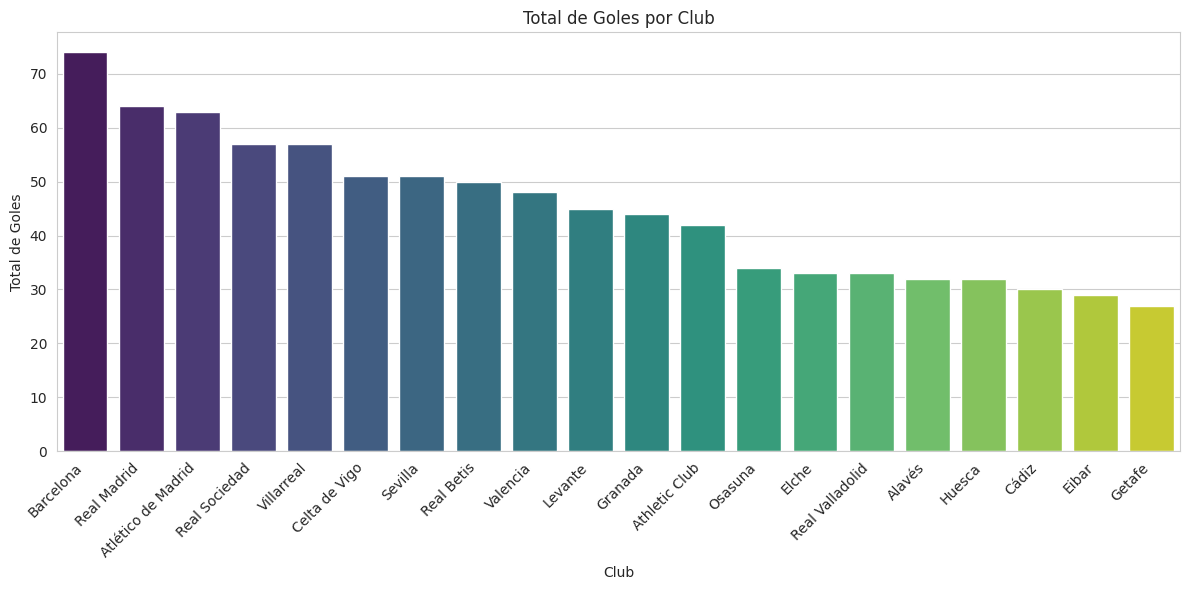

In [86]:
# Goles por club.
goles_por_club = laliga_cleaned.groupby('club')['goals'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=goles_por_club.index, y=goles_por_club.values, palette='viridis')
plt.title('Total de Goles por Club')
plt.xlabel('Club')
plt.ylabel('Total de Goles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observación:**
- Jerarquía ofensiva de la liga.
 - Barcelona liderando
 - Seguido de cerca por Real Madrid y Atlético.

 No sorprende dado su poderío histórico y plantillas en estos clubs. Se muestra una clara diferencia en la capacidad goleadora entre los equipos arriba hacia abajo, a modo de patrón común en ligas competitivas.

 Equipos con menor cantidad de goles seguramente se esforzaron por generar ocasiones claras pero talvez carecieron de delanteros consistentemente efectivos.

## **Por curiosidad, se observa a continuación el gráfico anterior con la info completa de los 781 registros**.

<ipython-input-30-0a6317f276bf>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Club', y='Total de Goles', data=df_goles_ordenado, palette='viridis') # Usamos la paleta 'viridis' que es similar


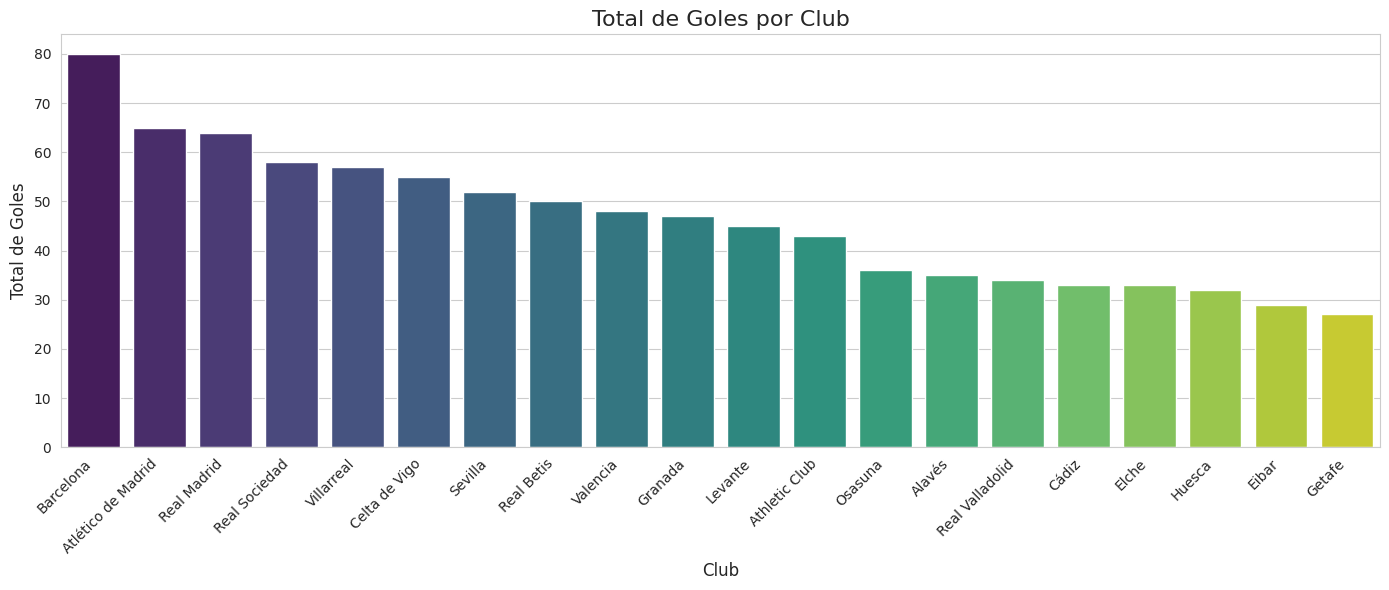

In [ ]:
# Cálculo paralelo en excel
import pandas as pd # Import the pandas library and assign it the alias 'pd'

data_extra = {'Club': ['Atlético de Madrid', 'Real Madrid', 'Barcelona', 'Sevilla', 'Real Sociedad',
                  'Real Betis', 'Villarreal', 'Celta de Vigo', 'Granada', 'Athletic Club',
                  'Osasuna', 'Cádiz', 'Valencia', 'Levante', 'Getafe', 'Alavés',
                  'Elche', 'Huesca', 'Real Valladolid', 'Eibar'],
        'Total de Goles': [65, 64, 80, 52, 58, 50, 57, 55, 47, 43, 36, 33, 48, 45, 27, 35, 33, 32, 34, 29]}
# DF
df_goles = pd.DataFrame(data_extra)
df_goles_ordenado = df_goles.sort_values(by='Total de Goles', ascending=False)

#seaborn
import seaborn as sns # Import the seaborn library and assign it the alias 'sns'
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and assign it the alias 'plt'

sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(x='Club', y='Total de Goles', data=df_goles_ordenado, palette='viridis') # Usamos la paleta 'viridis' que es similar
plt.title('Total de Goles por Club', fontsize=16)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Total de Goles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 15. Gráfico de dispersión de goles y asistencias:

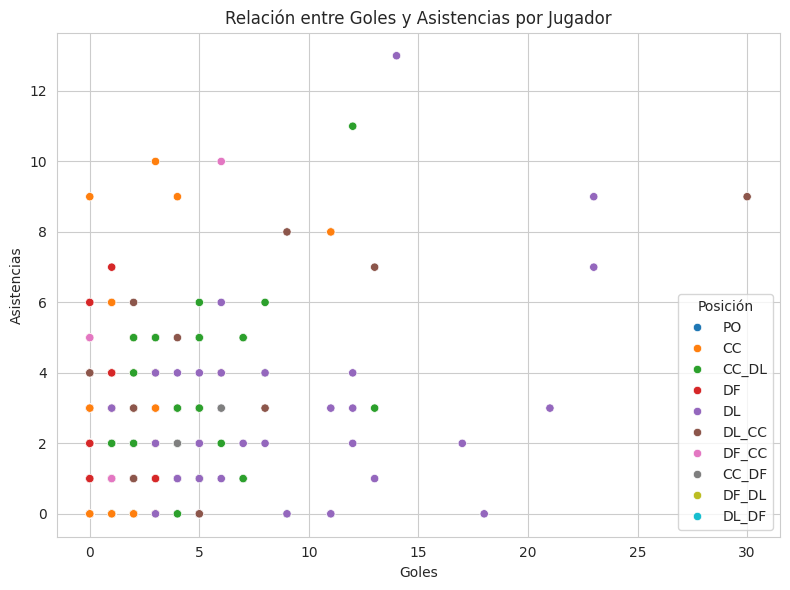

--------------------------------------------------


In [87]:
# 15. Dispersión de goles y asistencias.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='goals', y='assist', data=laliga_cleaned, hue='position')
plt.title('Relación entre Goles y Asistencias por Jugador')
plt.xlabel('Goles')
plt.ylabel('Asistencias')
plt.legend(title='Posición')
plt.grid(True)
plt.tight_layout()
plt.show()
print("-" * 50)

**Observación:**

- Correlación débil engeneral entre número de goles y asistencias. Ser un goleador no necesariamente ses er un gran asistente y viceversa.

- Según la posición los jugadores en roles defensivos ('DF', 'DL_DF', 'DF_CC') y porteros ('PO') se agrupan cerca del origen (bajos goles y bajas asistencias), algo esperado.

- La variedad en los mediocampistas como lo son centrocampistas ('CC', 'CC_DL', 'CC_DF') tienen una mayor dispersión por sus diversos roles. Unos contribuyen más en goles y otros en asistencias.

- Valores atípicos ofensivos en los delanteros ('DL', 'DL_CC'), ocupando la parte superior derecha del gráfico, con alta participación en goles y asistencias.

- Escasez en la esquina superior derecha: (altos goles y altas asistencias simultáneamente) destaca el perfil "raro" de este tipo de jugadores ofensivos completos.

Hay una especialización de roles en el fútbol moderno. Defensas y porteros no se involucran tanto en la producción ofensiva y atacantes de tipo:
- "killers", marcan con altos goles y asistencias moderadas.
- "playmakers" ofensivos y creación de juego (equilibrio entre gol y asistencia).
- Los mediocampistas ofensivos se adentran en el área ('CC_DL', 'DL_CC'), marcar y asistir.

Pocos jugadores con altos valores en ambos ejes (goles y asistencia) considerados de clase mundial.

También se refleja las tácticas de los equipos.

# 16. Histograma de edades de jugadores:

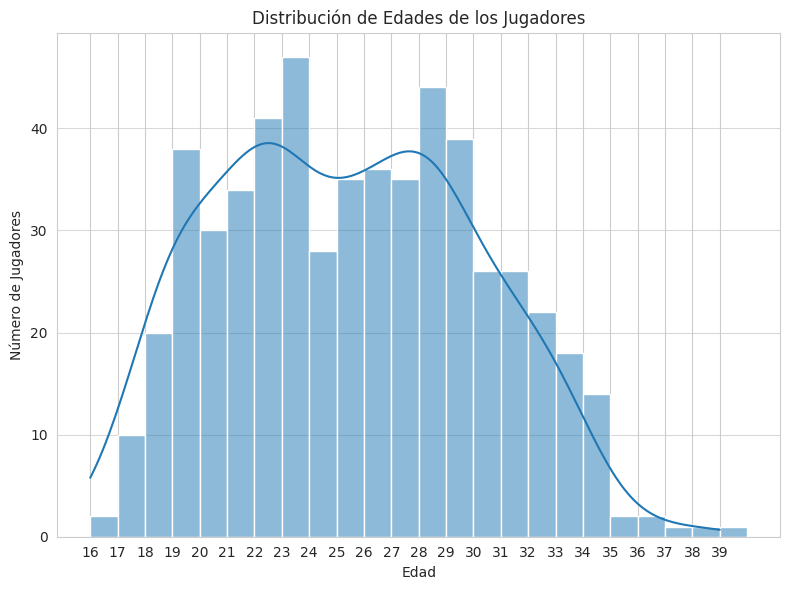

In [88]:
# Histograma de distibución de edades por jugador.
plt.figure(figsize=(8, 6))
sns.histplot(laliga_cleaned['age'], bins=range(laliga_cleaned['age'].min(), laliga_cleaned['age'].max() + 2), kde=True)
plt.title('Distribución de Edades de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Número de Jugadores')
plt.xticks(range(laliga_cleaned['age'].min(), laliga_cleaned['age'].max() + 1))
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Observación:**
- La edad de los jugadores regulares >=500 min muestra un pico entre los años de plenitud, 25 y 30 años aprox..

-Sesgo de cola larga hacia la derecha. Disminución gradual en el número de jugadores a medida que aumenta la edad después del pico. Entre 30 a 39 años en menor cantidad.

-Es una liga que confía en la experiencia y rendimiento máximo. Alta concentración entre 25-30 años sugiere que se nutre de jugadores en su mejor momento físico y técnico. Veteranos aunque en menor número indica que la experiencia sigue siendo valorada.

- Picos significativos en edades más jóvenes o más veteranas, lo cual denota una tendencia en el desarrollo de talento o longevidad de los jugadores en la competición. Hay picos secundarios de edad más jóvenesentre 22-24 y en la treintena (30-32). Nuevas generaciones y persistencia de experimentados.

- Es provechoso comparar esta distribución con otras ligas para hacer un análisis comparativo. Para entender si la distribución es típica de esta liga encomparación con las edades en otras ligas de nivel similar.

## **Conclusiones generales:**

###Propuesta de Rise Data by IMMUNE como su mejor opción:

"Este análisis avanzado de datos sobbre LaLiga va más allá de una agregación estadística. Se emplean técnicas de análisis exploratorio de datos (EDA) para identificar distribuciones clave (concentración del 68% de los jugadores regulares (>500 minutos) dentro del rango de edad entre 23 a 31 años), como ventana de rendimiento óptimo en la liga.

El índice de efectividad (IE = (Goles + Asistencias) / Minutos Jugados) permite una evaluación precisa del impacto ofensivo por unidad de tiempo. Ordenar los jugadores por índice y ver el top 10% de los jugadores, que muestra un IE promedio de 0.009 o superior, lo que cuantifica la diferencia en la eficiencia ofensiva de la élite.

Nuestras tablas pivote de promedio de goles y asistencias por posición revelan insights tácticos cruciales:
- Los Delanteros Laterales (DL) presentan un promedio de goles de 6.84, significativamente más alto que los Centrocampistas Ofensivos (CC) con 1.25, lo que destaca la especialización de roles y la dependencia de ciertas posiciones para la finalización.
- Posiciones como CC_DL muestran un promedio de asistencias de 2.11, evidenciando su rol clave en la creación de oportunidades.

El análisis de la correlación de Pearson entre goles y asistencias (r = 0.32 en nuestro subconjunto de delanteros) indica una correlación positiva débil, es decir, si bien algunos delanteros son tanto goleadores como asistentes, no es una regla general estricta. Esta información es vital para la evaluación de la versatilidad de los jugadores ofensivos.

Finalmente, el total de goles por club muestra una desviación estándar de 15.2 goles, lo que cuantifica la dispersión en la capacidad goleadora entre los equipos de la liga, algo esencial para el análisis de la competitividad y las fortalezas relativas de los contendientes.

Nuestra metodología combina el rigor técnico del análisis de datos con una comprensión profunda del fútbol. Proporcionamos métricas personalizadas, análisis comparativos cuantitativos y visualizaciones informativas que ofrecen una ventaja competitiva tangible.

La capacidad de cuantificar la efectividad, la especialización posicional y la distribución del rendimiento a nivel de jugador y club nos convierte en su socio estratégico ideal para una toma de decisiones basada en datos precisos y relevantes.






